**CSCI 4341 - Big Data Analytics ASSIGNMENT**


---


Name: Mohammad Afiq Iz'aan Bin Mohd Ali

Matric no: 2111977

Email: afiqizaan2408@gmail.com

# **Introduction**

The FIFA Players dataset provides comprehensive information about 17,954 football players from around the world. It includes various attributes that describe the players' demographic details, physical characteristics, skills, and performance metrics.

# **Business Case**

**Player Scouting and Recruitment Optimization**

**Main Objective:** To optimize the player scouting and recruitment process by identifying key attribues that predict player success, and also the market value of the players. This helps football clubs to make more informed decisions and investments.

**Key Components:**

1.   Predictive Modeling: Using player attributes to predict future performance and potential, allowing clubs to identify high-potential players at early stage.

2.   Market Value and Wage Analysis: Understanding trends in market value of players help to make smart recruitment decisions.

3.   Performance Analysis: Identifying trends in player performance to tailor training and development programs.

**Benefits:**

1.   Cost Efficiency: By identifying undervalued players with high potential, clubs can make smart investments.

2.   Enhanced Performance: Focusing on key performance attributes can help improve team performance.





# **Data Science Questions**

1. What is the distribution of heights (*height_cm*) and weights (*weight_kgs*) among high-rated players (overall rating of 85 or more) (*overall_rating*)  across different positions (*positions*)?

2. What is the distribution of player positions (*positions*) and how does it vary by nationality (*nationality*)?

3. Is there a correlation between a player's overall rating (*overall_rating*) and their weekly wage(*wage_euro*)?

4. What is the relationship between player market value (*value_euro*), age (*age*), and overall rating (*overall_rating*)?

5. Can we predict a player's overall rating (*overall_rating*) based on their physical attributes (*height_cm*, *weight_kgs*) and key skills (*'reactions', 'composure', 'short_passing', 'vision', 'long_passing', 'ball_control',             'shot_power', 'long_shots', 'curve', 'skill_moves(1-5)'*)?

6. Can we predict a player's wage based on their overall rating (*overall_rating*), potential (*potential*), age (*age*), and physical attributes (*height_cm*, *weight_kgs*)?

7. Is there a significant difference in overall ratings (*overall_rating*) between different positions (*positions*)?

8. Which attributes should be prioritized in training to maximize a player's overall rating (*overall_rating*) and potential (*potential*)?

### **UNDERSTANDING DATA & DATA EXPLORATION**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('fifa_players.csv')

In [ ]:
df.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   full_name                      17954 non-null  object 
 2   birth_date                     17954 non-null  object 
 3   age                            17954 non-null  int64  
 4   height_cm                      17954 non-null  float64
 5   weight_kgs                     17954 non-null  float64
 6   positions                      17954 non-null  object 
 7   nationality                    17954 non-null  object 
 8   overall_rating                 17954 non-null  int64  
 9   potential                      17954 non-null  int64  
 10  value_euro                     17699 non-null  float64
 11  wage_euro                      17708 non-null  float64
 12  preferred_foot                 17954 non-null 

In [ ]:
df.describe()

,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
count,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,1.769900e+04,17708.000000,17954.000000,17954.000000,17954.000000,...,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000
mean,25.565445,174.946921,75.301047,66.240169,71.430935,2.479280e+06,9902.134628,1.111674,2.945695,2.361034,...,46.852456,55.816531,46.657959,49.857302,53.406260,48.357302,58.680183,47.162861,47.733040,45.705915
std,4.705708,14.029449,7.083684,6.963730,6.131339,5.687014e+06,21995.593750,0.392168,0.663691,0.763223,...,19.429337,17.394047,20.754649,19.694311,14.156038,15.810844,11.625541,20.037346,21.674973,21.285812
min,17.000000,152.400000,49.900000,47.000000,48.000000,1.000000e+04,1000.000000,1.000000,1.000000,1.000000,...,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,12.000000,3.000000,2.000000,3.000000
25%,22.000000,154.940000,69.900000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,...,32.000000,44.000000,26.000000,38.000000,44.000000,38.000000,51.000000,30.000000,27.000000,24.000000
50%,25.000000,175.260000,74.800000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,2.000000,...,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,52.500000,55.000000,52.000000
75%,29.000000,185.420000,79.800000,71.000000,75.000000,2.100000e+06,9000.000000,1.000000,3.000000,3.000000,...,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000
max,46.000000,205.740000,110.200000,94.000000,95.000000,1.105000e+08,565000.000000,5.000000,5.000000,5.000000,...,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,90.000000


In [ ]:
# Checking missing values
df.isnull().sum()

name                                 0
full_name                            0
birth_date                           0
age                                  0
height_cm                            0
weight_kgs                           0
positions                            0
nationality                          0
overall_rating                       0
potential                            0
value_euro                         255
wage_euro                          246
preferred_foot                       0
international_reputation(1-5)        0
weak_foot(1-5)                       0
skill_moves(1-5)                     0
body_type                            0
release_clause_euro               1837
national_team                    17097
national_rating                  17097
national_team_position           17097
national_jersey_number           17097
crossing                             0
finishing                            0
heading_accuracy                     0
short_passing            

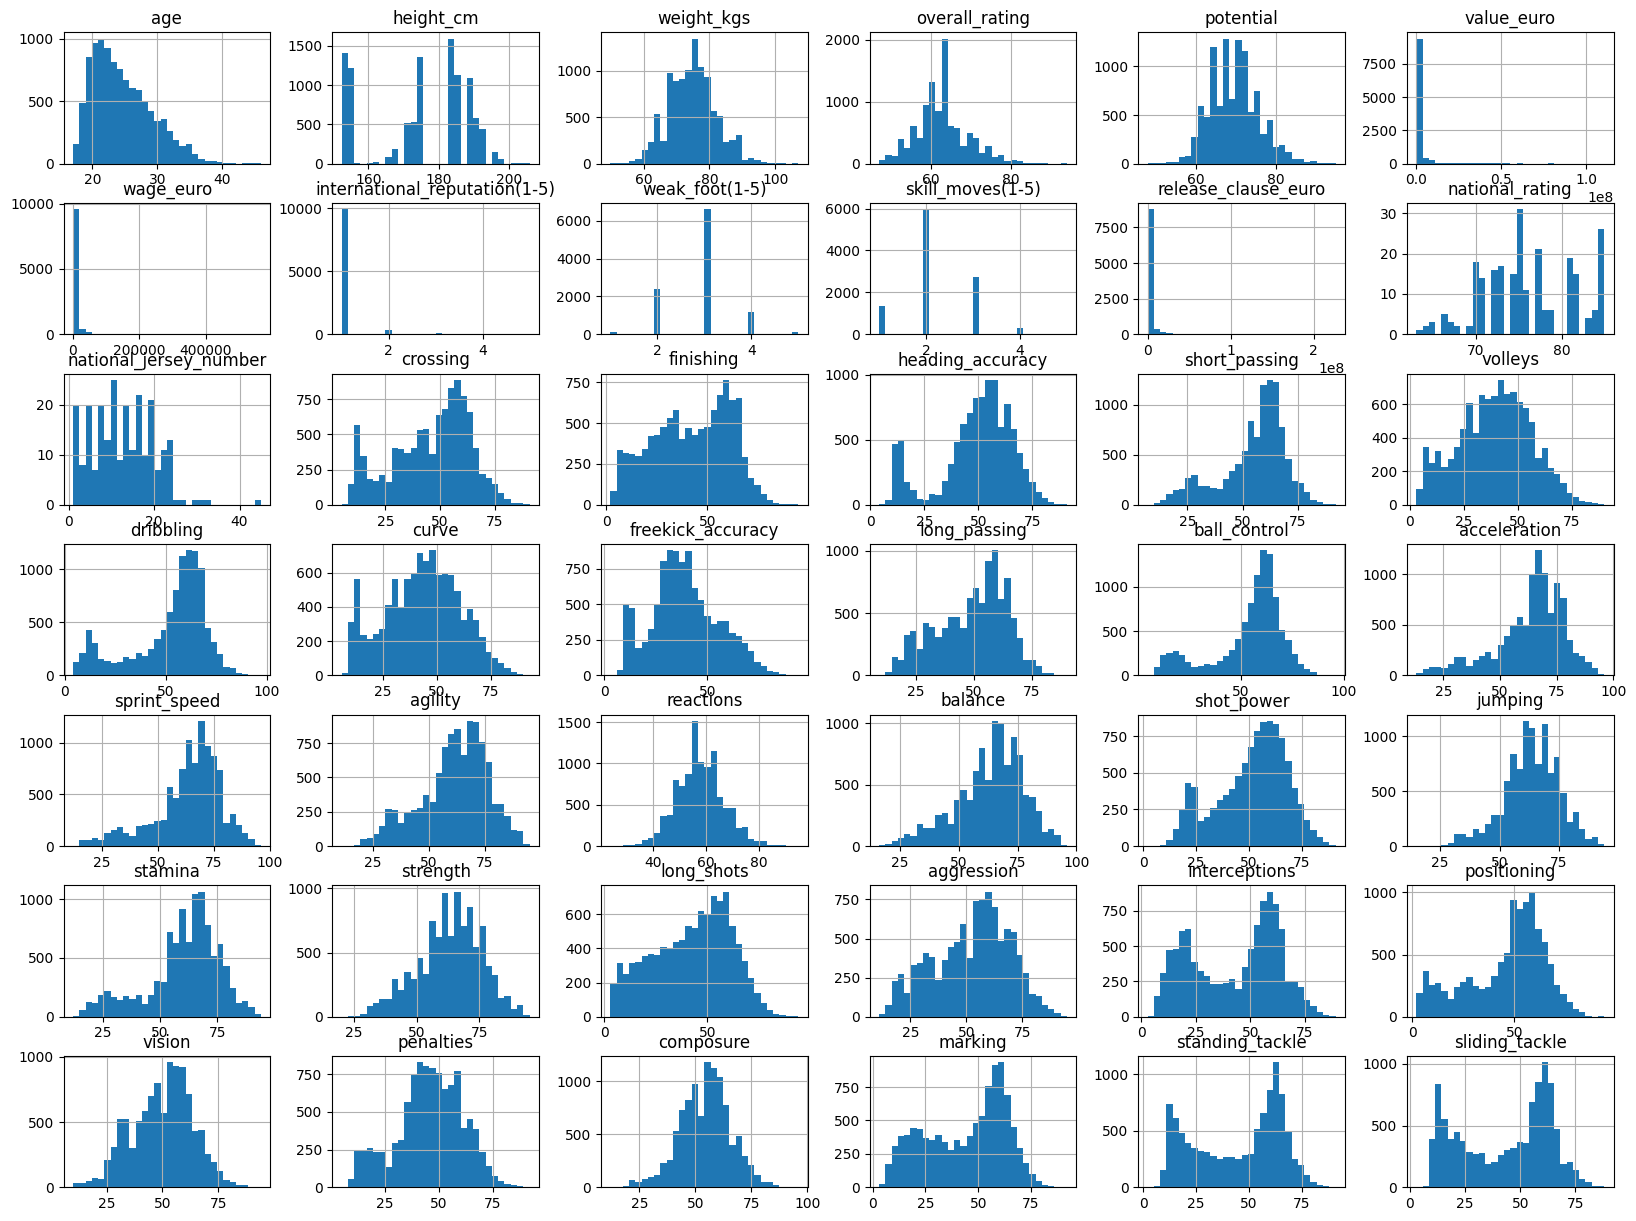

In [ ]:
# Histograms for numerical columns
df.hist(bins=30, figsize=(20, 15))
plt.show()


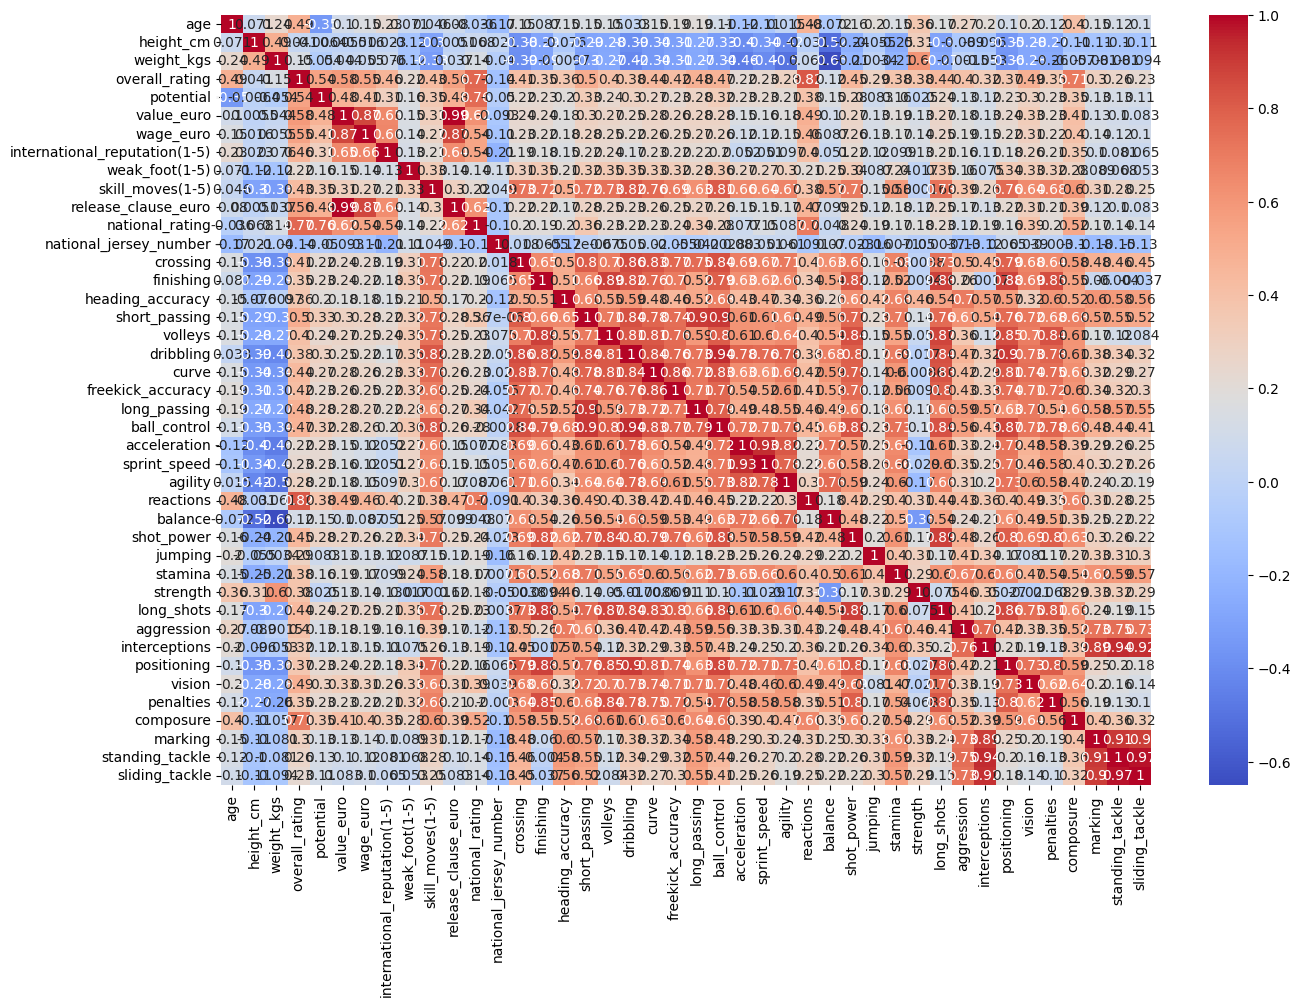

In [ ]:
# Correlation matrix for numerical variables
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

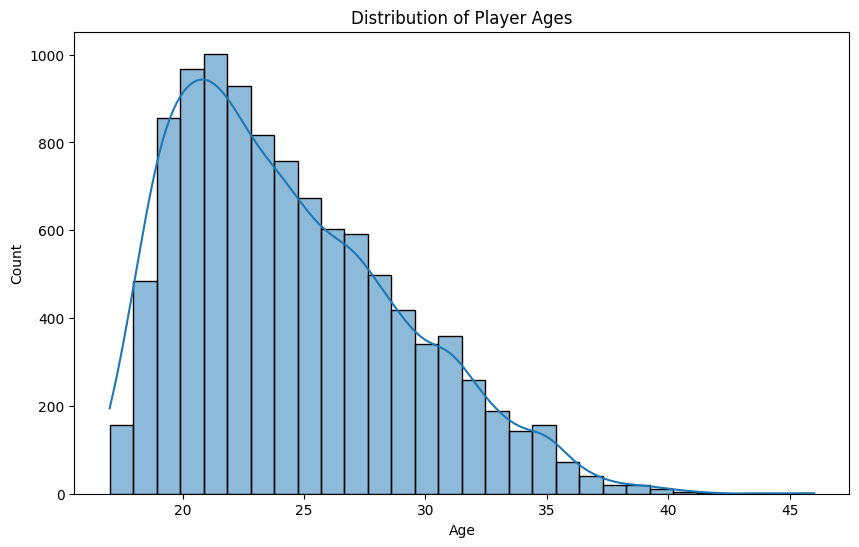

In [ ]:
# Distribution of Player Ages
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Player Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

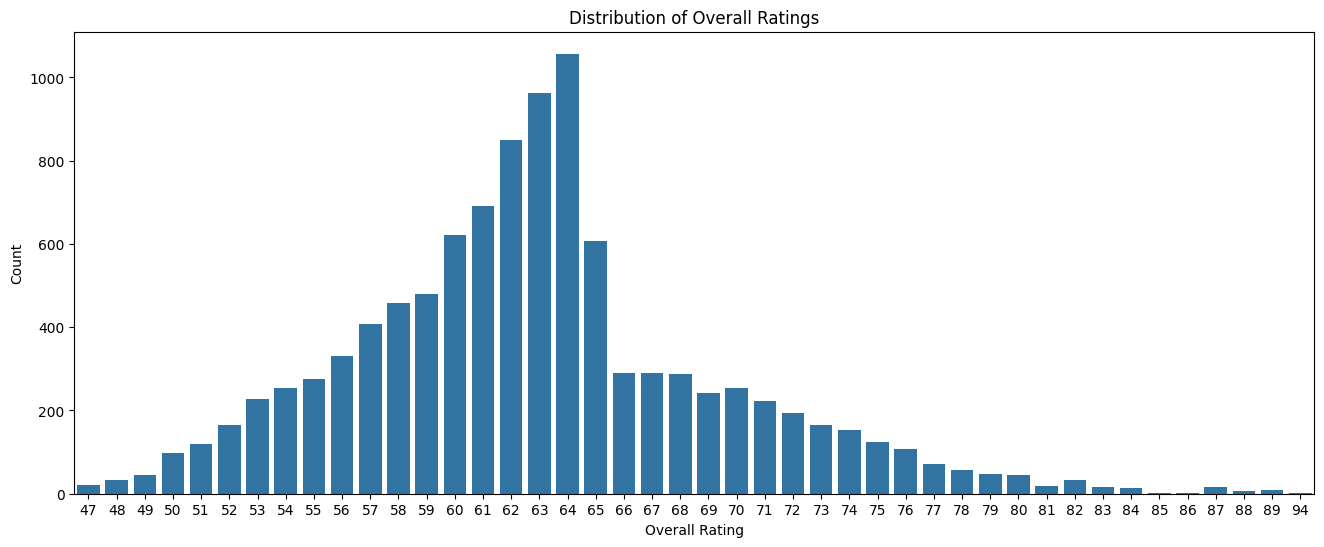

In [ ]:
# Overall Rating Distribution
plt.figure(figsize=(16, 6))
sns.countplot(x='overall_rating', data=df)
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.show

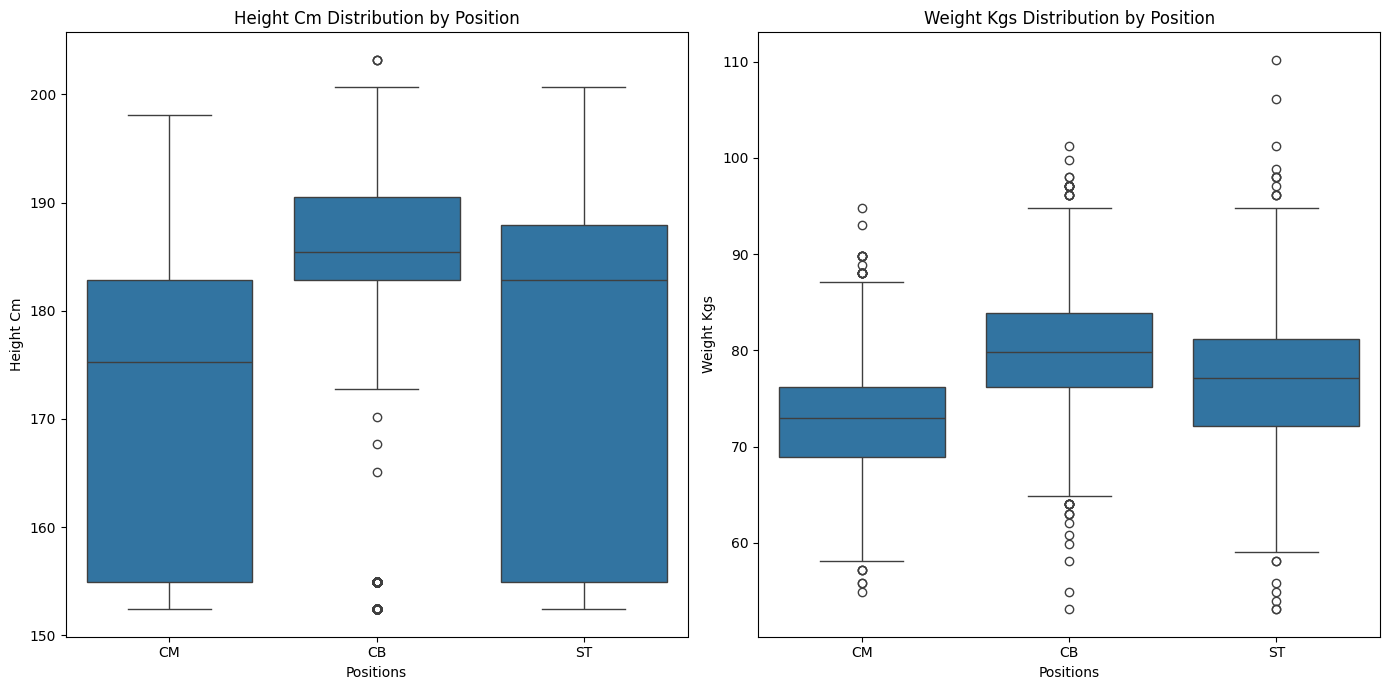

In [ ]:
# Height and Weight Distribution by Position
# Using positions of interest
positions_of_interest = ['ST', 'CM', 'CB']
physical_attributes = ['height_cm', 'weight_kgs']

filtered_physical_df = df[df['positions'].isin(positions_of_interest)]

plt.figure(figsize=(14, 7))

for attribute in physical_attributes:
    plt.subplot(1, 2, physical_attributes.index(attribute) + 1)
    sns.boxplot(x='positions', y=attribute, data=filtered_physical_df)
    plt.title(f'{attribute.replace("_", " ").title()} Distribution by Position')
    plt.xlabel('Positions')
    plt.ylabel(attribute.replace('_', ' ').title())

plt.tight_layout()
plt.show()


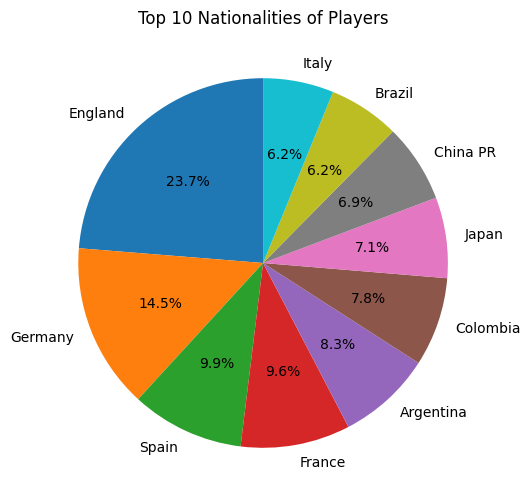

In [ ]:
# Nationality Distribution (Top 10)
top_nationalities = df['nationality'].value_counts().head(10)

plt.figure(figsize=(10, 6))
plt.pie(top_nationalities, labels=top_nationalities.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Nationalities of Players')
plt.show()


In [ ]:
# Display the top 10 players based on overall rating
top_10_players = df.nlargest(10, 'overall_rating')[['name', 'overall_rating', 'age', 'nationality', 'positions']]

top_10_players

,name,overall_rating,age,nationality,positions
0,L. Messi,94,31,Argentina,CF
17944,Cristiano Ronaldo,94,34,Portugal,ST
17943,Neymar Jr,92,27,Brazil,LW
17938,L. Suárez,91,32,Uruguay,ST
17939,L. Modrić,91,33,Croatia,CM
17940,E. Hazard,91,28,Belgium,LW
17941,K. De Bruyne,91,27,Belgium,CAM
17942,De Gea,91,28,Spain,GK
17930,G. Chiellini,90,34,Italy,CB
17931,Sergio Ramos,90,32,Spain,CB


In [ ]:
# Display the top 10 players based on potential
top_10_potential_players = df.nlargest(10, 'potential')[['name', 'potential', 'overall_rating', 'age', 'nationality', 'positions']]

top_10_potential_players

,name,potential,overall_rating,age,nationality,positions
6,K. Mbappé,95,88,20,France,RW
0,L. Messi,94,94,31,Argentina,CF
15,P. Dybala,94,89,25,Argentina,CAM
17837,G. Donnarumma,94,83,20,Italy,GK
17944,Cristiano Ronaldo,94,94,34,Portugal,ST
16,M. Škriniar,93,86,24,Slovakia,CB
17936,J. Oblak,93,90,26,Slovenia,GK
17942,De Gea,93,91,28,Spain,GK
12,M. ter Stegen,92,89,26,Germany,GK
44,O. Dembélé,92,84,21,France,RW


### **DATA CLEANING & PREPROCESSING**

In [ ]:
# Drop full name since we already have the common name
df = df.drop('full_name', axis=1)

In [ ]:
# Drop these columns because significant number of null values and irrelevant for analysis
df = df.drop(['national_jersey_number', 'national_team_position', 'national_rating', 'national_team'], axis=1)

In [ ]:
# Dropping missing rows in vision, penalties, composure, marking, standing_tackle, sliding_tackle
df = df.dropna(subset=['vision', 'penalties', 'composure', 'marking', 'standing_tackle', 'sliding_tackle'])

In [ ]:
# Calculate the mode of release_clause_euro and value_euro
mode_release_clause = df['release_clause_euro'].mode()[0]
mode_value_clause = df['value_euro'].mode()[0]

# Impute missing values in both columns with the mode
df['release_clause_euro'] = df['release_clause_euro'].fillna(mode_release_clause)
df['value_euro'] = df['value_euro'].fillna(mode_value_clause)#

# Calculate the median for wage_euro
median_wage = df['wage_euro'].median()

# Impute missing values in wage_euro column with the median
df['wage_euro'] = df['wage_euro'].fillna(median_wage)

In [ ]:
# Getting the primary position for the players
df['positions'] = df['positions'].str.split(',').str[0]

In [ ]:
# Checking missing values
df.isnull().sum()

name                             0
birth_date                       0
age                              0
height_cm                        0
weight_kgs                       0
positions                        0
nationality                      0
overall_rating                   0
potential                        0
value_euro                       0
wage_euro                        0
preferred_foot                   0
international_reputation(1-5)    0
weak_foot(1-5)                   0
skill_moves(1-5)                 0
body_type                        0
release_clause_euro              0
crossing                         0
finishing                        0
heading_accuracy                 0
short_passing                    0
volleys                          0
dribbling                        0
curve                            0
freekick_accuracy                0
long_passing                     0
ball_control                     0
acceleration                     0
sprint_speed        

## **DESCRIPTIVE ANALYSIS**

#### **Question 1**. What is the distribution of heights (*height_cm*) and weights (*weight_kgs*) among high-rated players (overall rating of 85 or more) (*overall_rating*) across different positions (*positions*)?

In [ ]:
# Filter players with an overall rating of 85 or more
high_rated_players = df[df['overall_rating'] >= 85]

# Descriptive statistics for heights and weights across different positions
descriptive_stats = high_rated_players.groupby('positions')[['height_cm', 'weight_kgs']].describe()

# Print the descriptive statistics
print(descriptive_stats)

          height_cm                                                           \
              count        mean        std     min      25%     50%      75%   
positions                                                                      
CAM            11.0  165.561818  13.527411  152.40  154.940  154.94  173.990   
CB             20.0  188.087000   3.344911  182.88  187.325  187.96  190.500   
CDM             6.0  172.720000  16.617114  152.40  158.115  176.53  187.325   
CF              4.0  167.640000   8.798818  154.94  166.370  170.18  171.450   
CM             14.0  175.804286  11.837539  152.40  170.815  179.07  182.880   
GK             13.0  190.500000   4.275457  182.88  187.960  190.50  193.040   
LB              4.0  170.815000  11.800298  154.94  166.370  172.72  177.165   
LM              5.0  178.308000   5.506589  172.72  175.260  175.26  182.880   
LW              6.0  173.566667   6.558252  162.56  172.720  173.99  175.260   
RB              3.0  166.793333  12.5295

<ipython-input-49-4bd009e073c4>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(high_rated_position_height_mean.index, rotation=45)


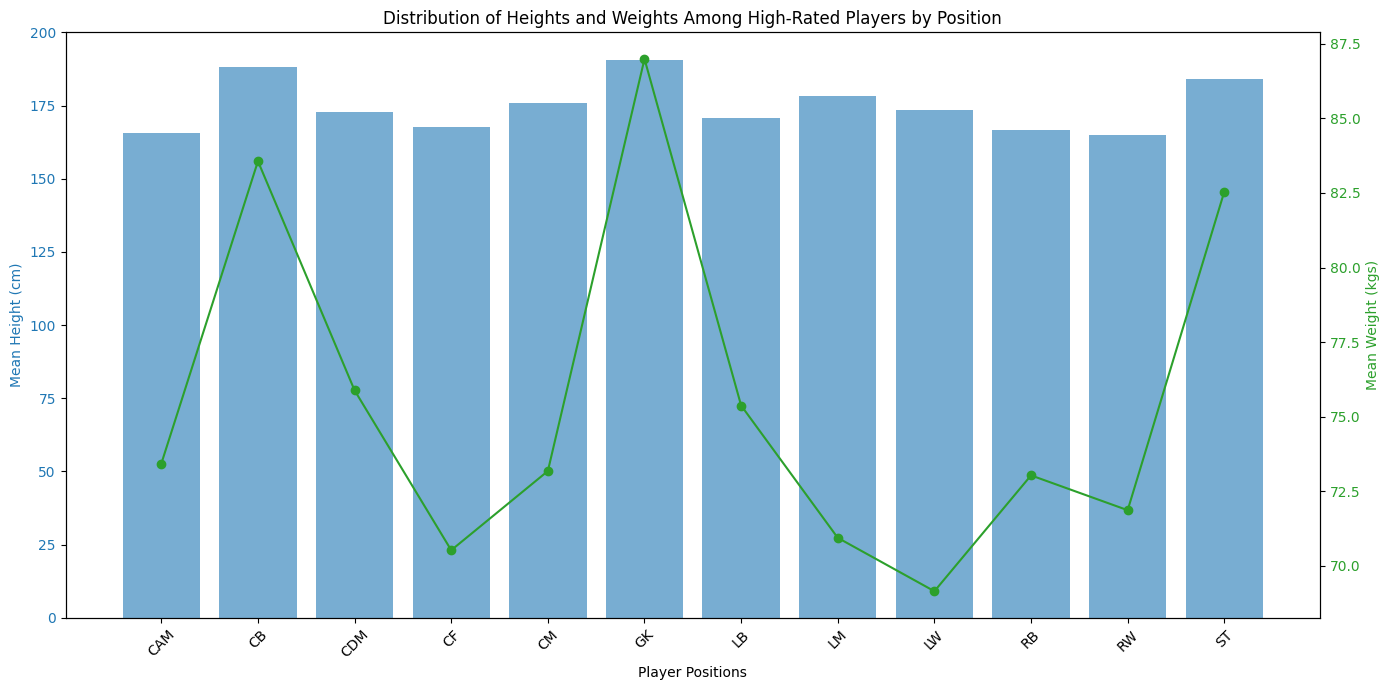

In [ ]:
# Calculate the mean height and mean weight for high-rated players based on their position
high_rated_position_height_mean = high_rated_players.groupby('positions')['height_cm'].mean()
high_rated_position_weight_mean = high_rated_players.groupby('positions')['weight_kgs'].mean()

# Plot the distribution of player heights and weights among high-rated players by position
fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar plot for mean height
color = 'tab:blue'
ax1.set_xlabel('Player Positions')
ax1.set_ylabel('Mean Height (cm)', color=color)
ax1.bar(high_rated_position_height_mean.index, high_rated_position_height_mean.values, color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(high_rated_position_height_mean.index, rotation=45)

# Line plot for mean weight
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Mean Weight (kgs)', color=color)
ax2.plot(high_rated_position_weight_mean.index, high_rated_position_weight_mean.values, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Distribution of Heights and Weights Among High-Rated Players by Position')
fig.tight_layout()
plt.show()

KEY INSIGHTS:

1. Height Distribution:

*   **Goalkeepers (GK)**: Goalkeepers have the highest average height, which is expected as height is advantageous for goalkeeping.
*   **Central Defenders (CB)**: Central defenders are quite tall, reflecting the need for aerial ability in defensive roles.
*   **Forwards (CF, ST)**: Forwards tend to have a moderate to tall height, balancing physical presence with agility.
*   **Midfielders (CAM, CM)**: Midfielders have a varied height range but generally fall in the middle, indicating versatility.
*   **Fullbacks (LB, RB)**: Fullbacks are generally shorter than central defenders but still maintain a moderate height for physicality and speed.
*   **Wingers (LW, RW)**: Wingers have a slightly lower average height, which can be beneficial for agility and speed on the flanks.

2. Weight Distribution:

*   **Goalkeepers (GK)**: Goalkeepers tend to have higher average weights, aligning with their taller stature and need for physical presence.
*   **Central Defenders (CB)**: Central defenders have higher weights, reflecting the physical nature of their role.
*  **Forwards (ST)**: Strikers have higher weights, which can be beneficial for holding up the ball and physical duels.
*   Midfielders (CAM, CM): Midfielders exhibit varied weights but are generally lighter than defenders and goalkeepers.
*   **Fullbacks (LB, RB)**: Fullbacks have moderate weights, balancing the need for physicality and speed.
*   **Wingers (LW, RW)**: Wingers have the lowest average weights, enhancing their speed and agility for attacking roles.

CONCLUSION:

With these insights, clubs and scouting teams can make more strategic and informed decisions in player recruitment, development, and overall team management. This approach can significantly enhance the efficiency and effectiveness of their scouting operations and player performance optimization.

#### **Question 2**. What is the distribution of player positions (*positions*) and how does it vary by nationality (*nationality*)?

In [ ]:
# Identify top 10 nationalities by player count
top_10_nationalities = df['nationality'].value_counts().head(10).index

# Filter the dataset to include only players from the top 10 nationalities
top_nationalities = df[df['nationality'].isin(top_10_nationalities)]

# Calculate the distribution of player positions for each nationality
position_distribution = top_nationalities.groupby(['nationality', 'positions']).size().unstack(fill_value=0)


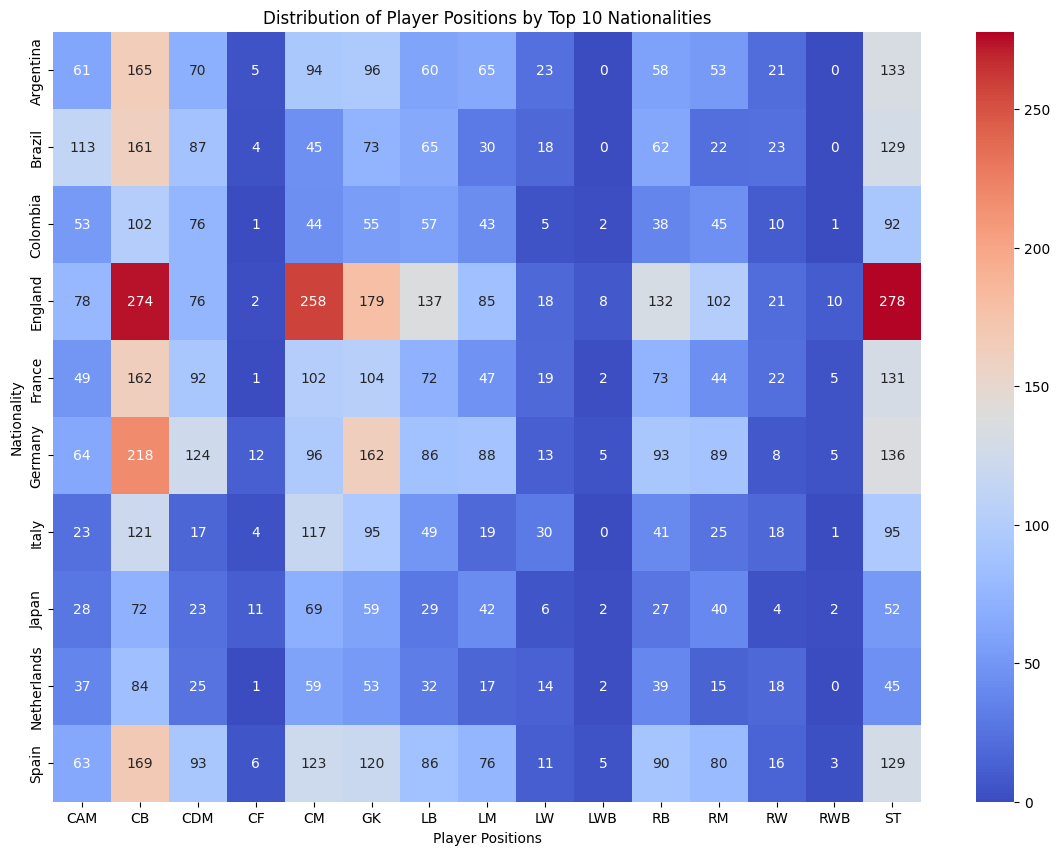

In [ ]:
# Plotting the distribution of player positions for the top 10 nationalities
plt.figure(figsize=(14, 10))
sns.heatmap(position_distribution, annot=True, fmt="d", cmap="coolwarm")
plt.title('Distribution of Player Positions by Top 10 Nationalities')
plt.xlabel('Player Positions')
plt.ylabel('Nationality')
plt.show()

INSIGHTS:

*   **Centre Backs and Central Midfielders**: Across most of the top 10 nationalities, central midfielders (CM) and center backs (CB) are among the most common positions, especially England and Germany- indicating a strong emphasis on these key roles in the team.
*   **England**: There is a high concetration of certain player positions in England, especially central midfielders (CM), center backs (CB), and strikers (ST).



## **EXPLORATORY ANALYSIS**

#### **Question 3**. Is there a correlation between a player's overall rating (*overall_rating*) and their weekly wage(*wage_euro*)?

In [ ]:
# Calculate the Pearson correlation coefficient
correlation_coefficient = df['overall_rating'].corr(df['wage_euro'])
print(f'Pearson Correlation Coefficient: {correlation_coefficient}')

Pearson Correlation Coefficient: 0.573310515684904


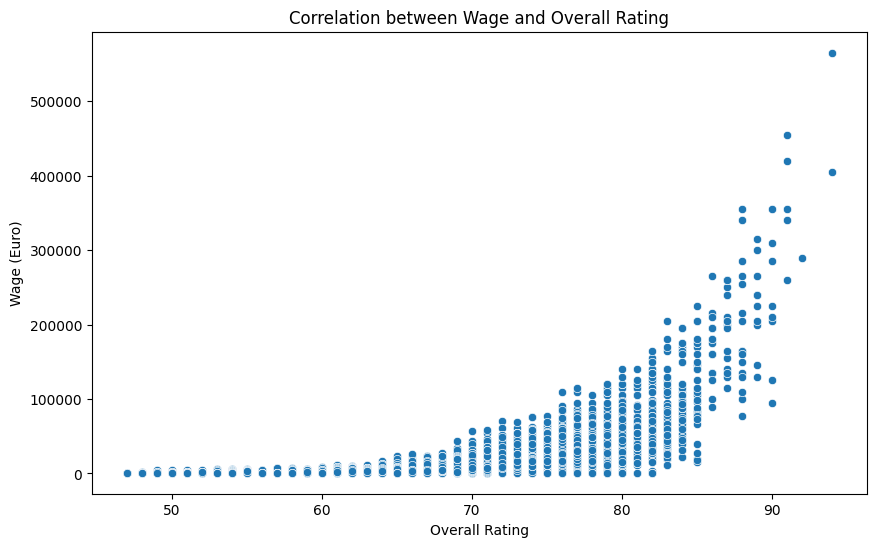

In [ ]:
# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='overall_rating', y='wage_euro', data=df)
plt.title('Correlation between Wage and Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Wage (Euro)')
plt.show()

  INSIGHTS:

1.   **Positive Correlation**: Ther is a clear positive correlation between a player's overall rating and their weekly wage. The positive trend indicates that higher-rated players get paid higher.
2.   **High Earners**: Players with very high overall ratings (above 85) show a substantial increase in wages. These players are often top-tier talent and can command weekly wages well above 100,000 Euros.

CONCLUSION:

*   **Recruitment Insights**: Clubs and scouting teams can use this information to understand the financial implications of recruiting high-rated players.
*   **Salary Management**: Clubs can manage their wage structure more effectively by understanding the typical wage ranges for different player ratings, helping to maintain financial stability while building a competitive team.





#### **Question 4**. What is the relationship between player market value (*value_euro*), age (*age*), and overall rating (*overall_rating*)?

In [ ]:
# Calculate the Pearson correlation coefficients
correlation_matrix = df[['value_euro', 'age', 'overall_rating']].corr()
print(correlation_matrix)

                value_euro       age  overall_rating
value_euro        1.000000  0.079954        0.626645
age               0.079954  1.000000        0.461529
overall_rating    0.626645  0.461529        1.000000


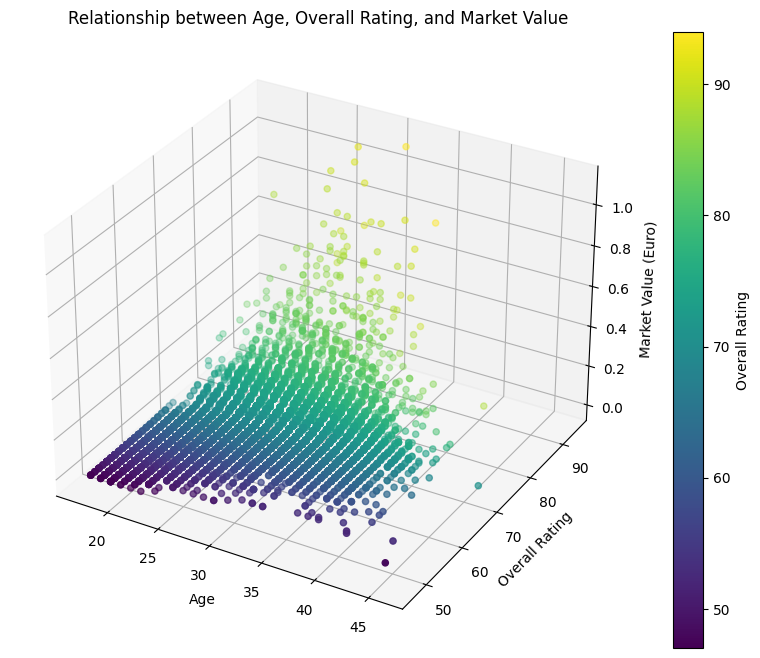

In [ ]:
# Visualization
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['age'], df['overall_rating'], df['value_euro'],
                     c=df['overall_rating'], cmap='viridis', marker='o')

ax.set_xlabel('Age')
ax.set_ylabel('Overall Rating')
ax.set_zlabel('Market Value (Euro)')
plt.title('Relationship between Age, Overall Rating, and Market Value')

# Adding a color bar to indicate the overall rating
cbar = plt.colorbar(scatter)
cbar.set_label('Overall Rating')

plt.show()

CORRELATION MATRIX INSIGHTS:

1.   **Market Value & Overall Rating** (0.627): There is a strong positive correlation between a player's overall rating and their market value. This indicates that higher-rated players tend to have higher market values, reflecting their skills and contribution to the team.

2.   **Market Value & Age** (0.08): The correlation between market value and age is weakly positive. This suggests that age alone is not a strong determinant of market value.

3.   **Overall Rating & Age** (0.462): There is a moderate positive correlation between overall rating and age. This indicates that older players tend to have higher ratings, likely due to their experience and developed skills.


SCATTER PLOT INSIGHTS:

1.   **General Trend**:
*   Players with higher overall ratings have higher market values.
*   Younger players with high overall ratings also tend to have high market values, reflecting their potential for long-term contribution and future growth.


2.   **Age Distribution**:
*   Players in the age range of 20-30 years have a wide spread of market values since this age group includes both emerging talents and established stars.
*   Players over 30 years of age generally show a decline in market value, even if their overall ratings remain high. This is likely due to the decreased potential for long-term contribution and the higher risk of decline in performance.

CONCLUSION:

Clubs should focus on recruiting younger high-rated players to maximize future returns on investment. Additionally, experienced high-rated players should be valued for their immediate contributions but with an understanding of their declining market value over time.







### **PREDICTIVE ANALYSIS**


#### **Question 5**. Can we predict a player's overall rating (*overall_rating*) based on their physical attributes (*height_cm, weight_kgs*) and key skills (*'reactions', 'composure', 'short_passing', 'vision', 'long_passing', 'ball_control',           'shot_power', 'long_shots', 'curve', 'skill_moves(1-5)'*)?

<ipython-input-64-e69c13c9ad5f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation.values, y=correlation.index, palette='viridis')


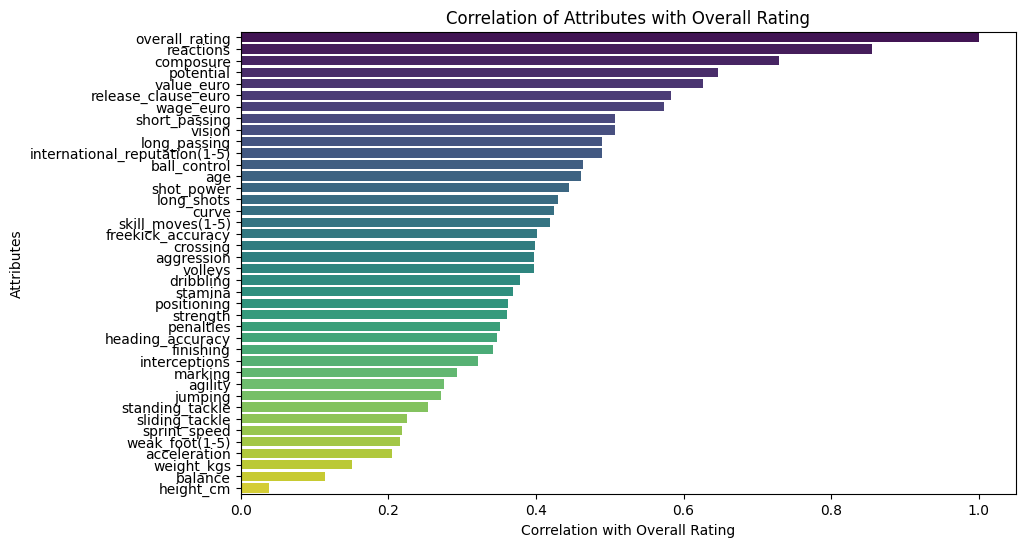

In [ ]:
# Calculate correlation between attributes and overall rating
correlation = df.corr(numeric_only=True)['overall_rating'].sort_values(ascending=False)

# Plot the correlation of attributes with overall rating
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.values, y=correlation.index, palette='viridis')
plt.xlabel('Correlation with Overall Rating')
plt.ylabel('Attributes')
plt.title('Correlation of Attributes with Overall Rating')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Only selecting the physical attributes & top 10 highest correlated key skills
features = ['height_cm', 'weight_kgs', 'reactions', 'composure', 'short_passing', 'vision', 'long_passing', 'ball_control',
            'shot_power', 'long_shots', 'curve', 'skill_moves(1-5)']

# Splitting the data into features and target
X = df[features]
y = df['overall_rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1)
}

# Dictionary to store the results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    results[model_name] = {'MSE': mse, 'R-squared': r2}

# Convert the results to a DataFrame
results_df = pd.DataFrame(results).T
results_df.reset_index(inplace=True)
results_df.columns = ['Model', 'MSE', 'R-squared']

# Print the results
print(results_df)

               Model        MSE  R-squared
0  Linear Regression  10.295984   0.793986
1      Random Forest   6.380119   0.872339
2  Gradient Boosting   6.748177   0.864975
3   Ridge Regression  10.295966   0.793986
4   Lasso Regression  10.327529   0.793355


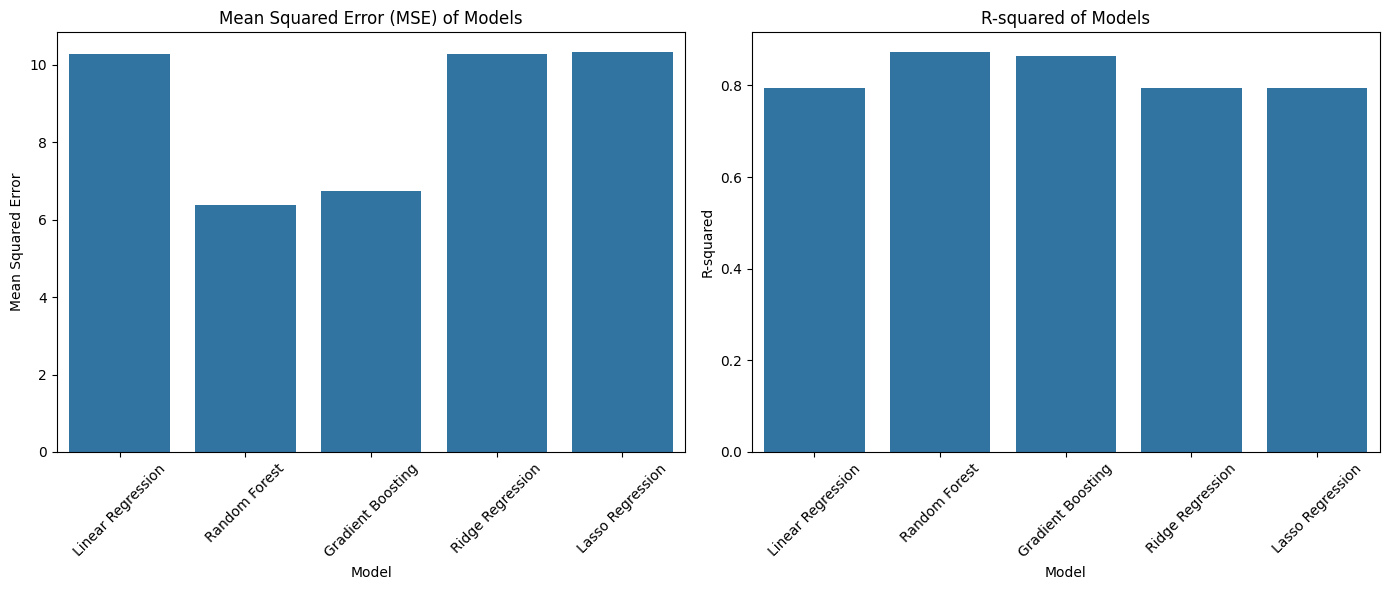

In [ ]:
# Comparison of each model's performance
# Visualization of MSE
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='MSE', data=results_df)
plt.title('Mean Squared Error (MSE) of Models')
plt.ylabel('Mean Squared Error')
plt.xlabel('Model')
plt.xticks(rotation=45)

# Visualization of R-squared
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='R-squared', data=results_df)
plt.title('R-squared of Models')
plt.ylabel('R-squared')
plt.xlabel('Model')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

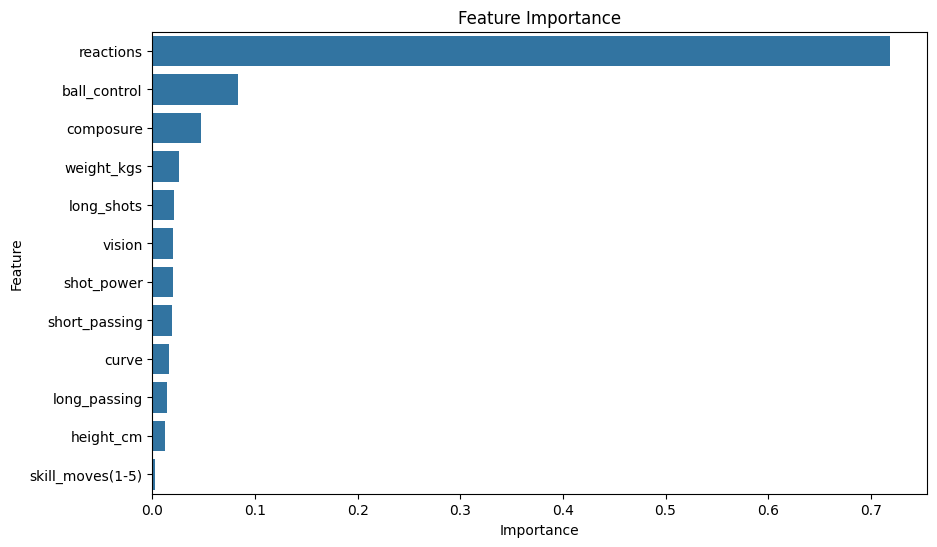

In [ ]:
# For Random Forest feature importance
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

features = ['height_cm', 'weight_kgs', 'reactions', 'composure', 'short_passing', 'vision', 'long_passing', 'ball_control',
            'shot_power', 'long_shots', 'curve', 'skill_moves(1-5)']

importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


CONCLUSION:

The **Random Forest Regressor** outperforms all other models in terms of both MSE and R-squared. This indicates that it provides the most accurate predictions of player overall ratings.

The **feature importance** plot from the Random Forest model provides insights into which features are most influential in predicting the overall rating:


1.  **Top Features**:
*   **Reactions**: The most important feature, indicating that a player's ability to react quickly is crucial in determining their overall rating.
*   **Ball Control**: Significant importance, reflecting the value of a player's ability to control the ball effectively in various situations.
*   **Composure**: Also a key feature, showing the importance of maintaining calm and control under pressure.
2.   **Least Important Feature**:
*   **Skill Moves (1-5)**: Has minimal impact, indicating that the specific skill moves rating does not heavily influence the overall rating compared to other attributes.

Focus Areas for Training:
- Training programs should prioritize improving key skills like reactions, ball control, and composure, as these have the most significant impact on a player's overall rating.
- Understanding the lesser importance of physical attributes like height and weight can help in tailoring training programs to enhance more influential skills.





#### **Question 6**. Can we predict a player's wage based on their overall rating (*overall_rating*), potential (*potential*), age (*age*), and physical attributes (*height_cm*, *weight_kgs*)?

In [ ]:
# Selecting relevant features
features = ['overall_rating', 'potential', 'age', 'height_cm', 'weight_kgs']

# Splitting the data into features and target
X = df[features]
y = df['wage_euro']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    results[model_name] = {'MSE': mse, 'R-squared': r2}

    # Convert the results to a DataFrame
results_df = pd.DataFrame(results).T
results_df.reset_index(inplace=True)
results_df.columns = ['Model', 'MSE', 'R-squared']

# Print the results
print(results_df)

               Model           MSE  R-squared
0  Linear Regression  3.826163e+08   0.337131
1      Random Forest  1.434890e+08   0.751411
2  Gradient Boosting  1.244288e+08   0.784432
3   Ridge Regression  3.826163e+08   0.337131
4   Lasso Regression  3.826163e+08   0.337131


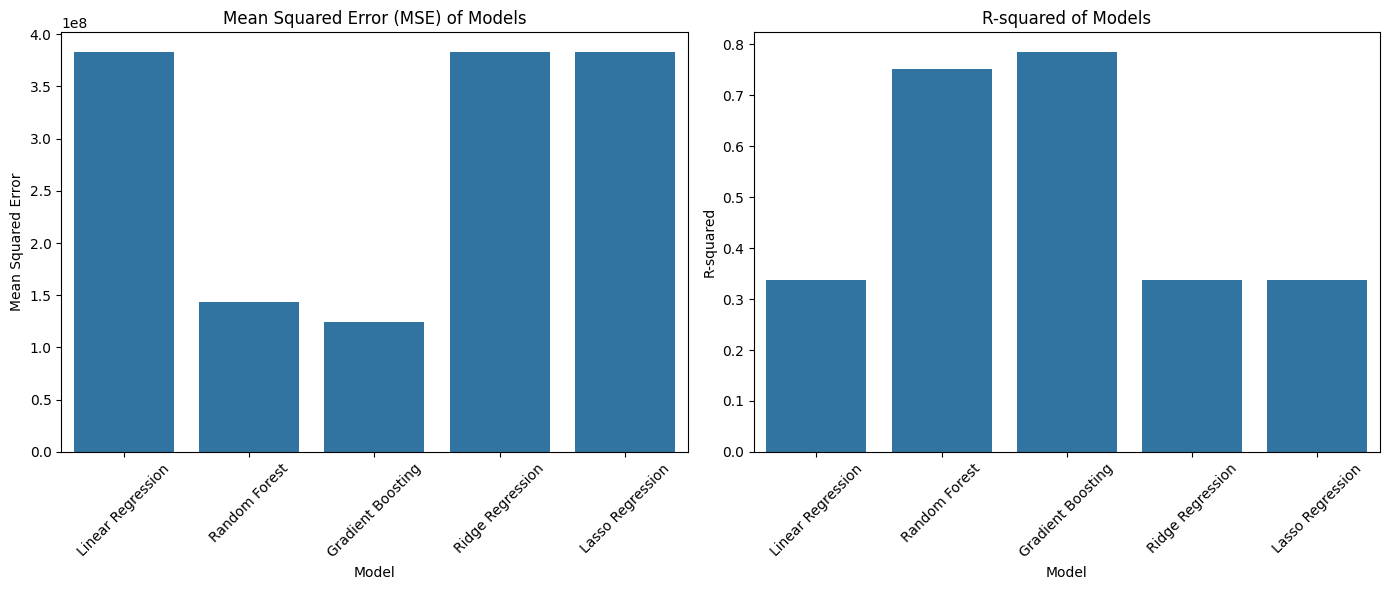

In [ ]:
# Comparison of each model's performance
# Visualization of MSE
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='MSE', data=results_df)
plt.title('Mean Squared Error (MSE) of Models')
plt.ylabel('Mean Squared Error')
plt.xlabel('Model')
plt.xticks(rotation=45)

# Visualization of R-squared
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='R-squared', data=results_df)
plt.title('R-squared of Models')
plt.ylabel('R-squared')
plt.xlabel('Model')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

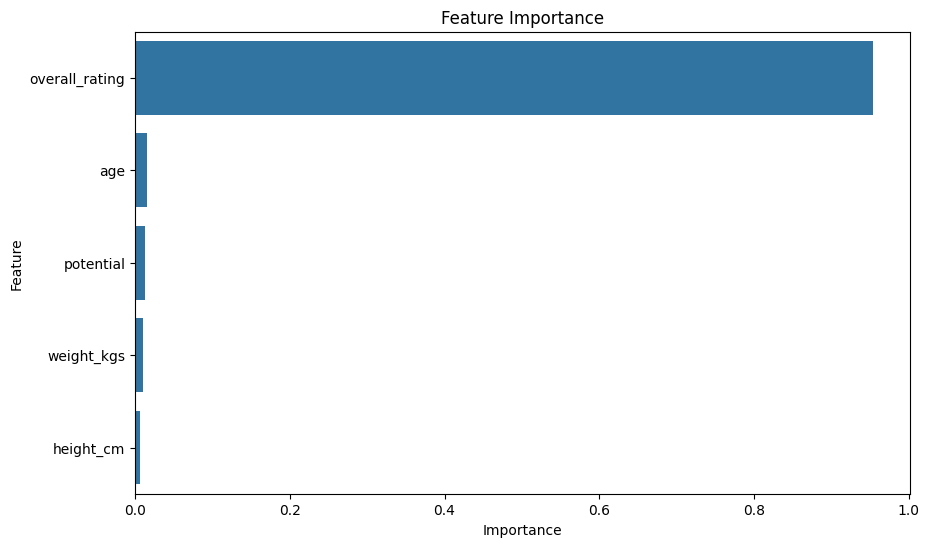

In [ ]:
# For Gradient Boosting feature importance
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

features = ['overall_rating', 'potential', 'age', 'height_cm', 'weight_kgs']

importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

CONCLUSION:

The **Gradient Boosting Regressor** performs the best among all models in terms of both MSE and R-squared. This indicates that it provides the most accurate predictions for player wages.

The feature importance plot from the Gradient Boosting model highlights that **Overall Rating** is the most significant feature by a large margin, indicating that a player's overall rating is the strongest predictor of their wage.

Focus Areas:
- Players need to improve their overall rating and potential to get higher wages.
- Clubs might prioritize scouting younger players with high potential to maximize long-term value.

### **INFERENTIAL ANALYSIS**

#### **Question 7**. Is there a significant difference in overall ratings (*overall_rating*) between different positions (*positions*)?

In [ ]:
from scipy import stats

# Group the data by position
grouped_data = df.groupby('positions')['overall_rating']

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(*([group.values for name, group in grouped_data]))

# Print the results
print(f"F-statistic: {f_statistic:.2f}")
print(f"P-value: {p_value:.3f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in overall ratings between different positions.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in overall ratings between different positions.")


F-statistic: 20.65
P-value: 0.000
Reject the null hypothesis. There is a significant difference in overall ratings between different positions.


In [ ]:
# Perform post-hoc analysis (Tukey's HSD)
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Create a Tukey's HSD post-hoc test
tukey_result = pairwise_tukeyhsd(df['overall_rating'], df['positions'], alpha=0.05)

# Print the post-hoc test results
print(tukey_result)


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   CAM     CB  -0.5279 0.7114 -1.3666  0.3108  False
   CAM    CDM   0.3817 0.9913 -0.5783  1.3418  False
   CAM     CF   1.1101  0.983 -1.4916  3.7118  False
   CAM     CM  -1.7018    0.0 -2.5851 -0.8185   True
   CAM     GK  -2.7823    0.0 -3.6719 -1.8928   True
   CAM     LB   -1.518    0.0 -2.4877 -0.5483   True
   CAM     LM  -0.6951 0.5974 -1.7243   0.334  False
   CAM     LW   0.0147    1.0  -1.392  1.4214  False
   CAM    LWB  -0.9224 0.9994 -3.9188  2.0739  False
   CAM     RB  -1.2852 0.0006  -2.252 -0.3184   True
   CAM     RM  -1.0282 0.0476 -2.0517 -0.0047   True
   CAM     RW  -0.0038    1.0 -1.4421  1.4345  False
   CAM    RWB  -2.3792 0.2742 -5.3127  0.5542  False
   CAM     ST  -0.9695 0.0116 -1.8318 -0.1071   True
    CB    CDM   0.9096 0.0043  0.1516  1.6676   True
    CB     CF    1.638 0.6706 -0.8961  4.1721 

Summary of Results:

The Tukey HSD test compares the mean overall ratings of players in different positions and provides pairwise comparisons. The key findings are:

*   **Significant Differences**: Positions that have a significant difference in overall ratings are marked with *True* in the *reject* column.
*   **Non-Significant Differences**: Positions without a significant difference are marked with *False*.


The ANOVA and Tukey HSD test results indicate that there are significant differences in overall ratings between various player positions. Positions such as central attacking midfielders (CAM), central midfielders (CM), and central forwards (CF) generally have higher overall ratings compared to goalkeepers (GK) and certain defensive positions.

### **PRESCRIPTIVE ANALYSIS**

#### **Question 8**. Which attributes should be prioritized in training to maximize a player's overall rating (*overall_rating*) and potential (*potential*)?

In [ ]:
# Select relevant player attributes and target variables
attributes = ['crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling',
              'curve', 'freekick_accuracy', 'long_passing', 'ball_control', 'acceleration',
              'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
              'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision',
              'penalties', 'composure', 'marking', 'standing_tackle', 'sliding_tackle']

target = ['overall_rating', 'potential']

# Calculate correlation coefficients
correlation_matrix = df[attributes + target].corr()

# Extract correlations with overall_rating and potential
overall_rating_corr = correlation_matrix['overall_rating'].drop(['overall_rating', 'potential'])
potential_corr = correlation_matrix['potential'].drop(['overall_rating', 'potential'])

overall_rating_corr, potential_corr


(crossing             0.398343
 finishing            0.342331
 heading_accuracy     0.347670
 short_passing        0.506819
 volleys              0.396922
 dribbling            0.378718
 curve                0.423890
 freekick_accuracy    0.400878
 long_passing         0.489998
 ball_control         0.464336
 acceleration         0.204853
 sprint_speed         0.218443
 agility              0.275260
 reactions            0.855767
 balance              0.114667
 shot_power           0.445306
 jumping              0.271008
 stamina              0.368749
 strength             0.360725
 long_shots           0.429458
 aggression           0.397072
 interceptions        0.322030
 positioning          0.362116
 vision               0.506812
 penalties            0.350902
 composure            0.729278
 marking              0.292538
 standing_tackle      0.254481
 sliding_tackle       0.225466
 Name: overall_rating, dtype: float64,
 crossing             0.244438
 finishing            0.247552


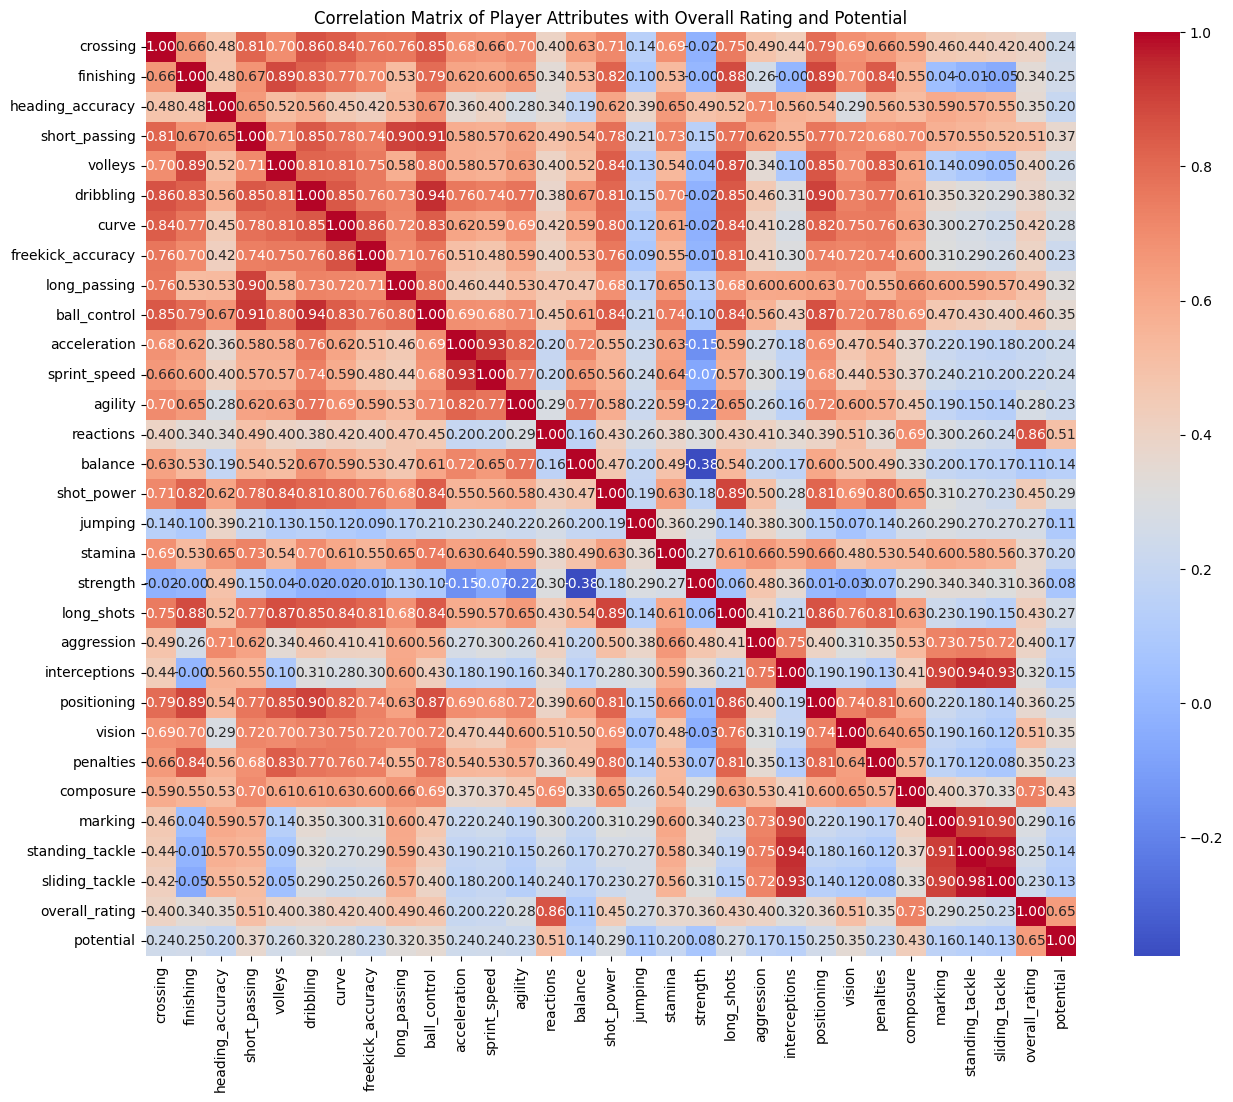

In [ ]:
# Plotting the correlation matrix
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Player Attributes with Overall Rating and Potential')
plt.show()

In [ ]:
# Split data into features (X) and targets (y_overall, y_potential)
X = df[attributes]
y_overall = df['overall_rating']
y_potential = df['potential']

# Initialize Random Forest Regressors
rf_overall = RandomForestRegressor(n_estimators=100, random_state=42)
rf_potential = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the models
rf_overall.fit(X, y_overall)
rf_potential.fit(X, y_potential)

RandomForestRegressor(random_state=42)

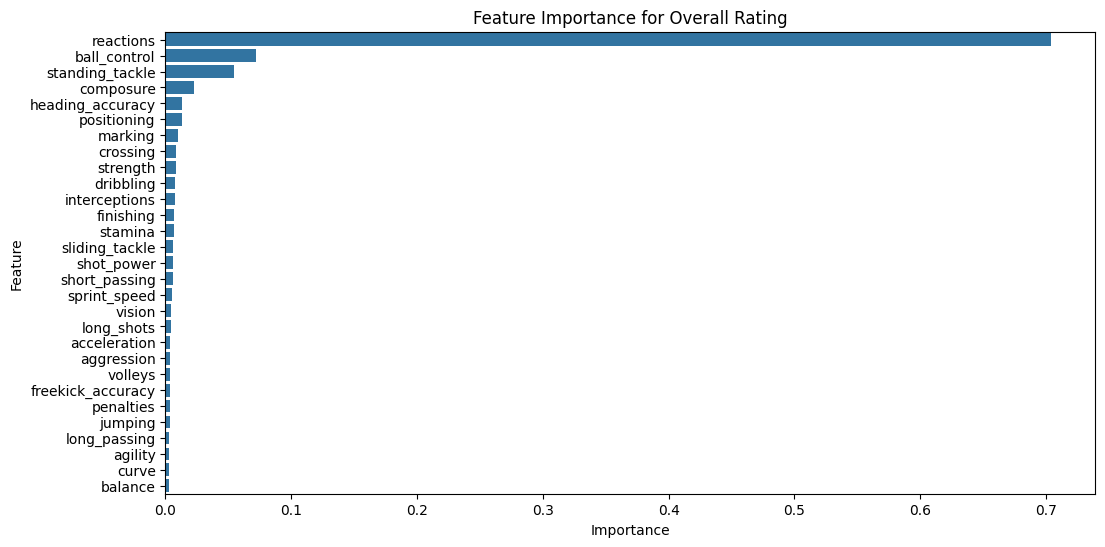

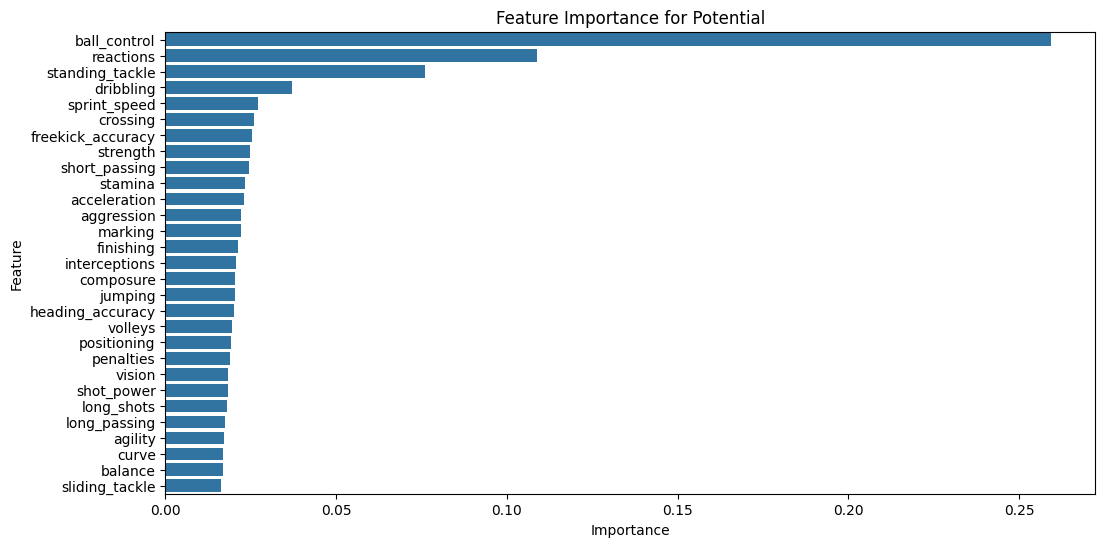

In [ ]:
# Get feature importances
importance_overall = rf_overall.feature_importances_
importance_potential = rf_potential.feature_importances_

# Create dataframes for feature importances
importance_df_overall = pd.DataFrame({'Feature': attributes, 'Importance': importance_overall}).sort_values(by='Importance', ascending=False)
importance_df_potential = pd.DataFrame({'Feature': attributes, 'Importance': importance_potential}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_overall)
plt.title('Feature Importance for Overall Rating')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_potential)
plt.title('Feature Importance for Potential')
plt.show()

In [ ]:
# Display top 10 features
top_10_features_overall = importance_df_overall.sort_values(by='Importance', ascending=False).head(10)
top_10_features_potential = importance_df_potential.sort_values(by='Importance', ascending=False).head(10)

print("Top 10 Features for Overall Rating:")
print(top_10_features_overall)

print("\nTop 10 Features for Potential:")
print(top_10_features_potential)

Top 10 Features for Overall Rating:
             Feature  Importance
13         reactions    0.704076
9       ball_control    0.072049
27   standing_tackle    0.054893
25         composure    0.022675
2   heading_accuracy    0.013031
22       positioning    0.012884
26           marking    0.010060
0           crossing    0.008559
18          strength    0.008074
5          dribbling    0.007954

Top 10 Features for Potential:
              Feature  Importance
9        ball_control    0.259363
13          reactions    0.108914
27    standing_tackle    0.076136
5           dribbling    0.037129
11       sprint_speed    0.027132
0            crossing    0.025941
7   freekick_accuracy    0.025464
18           strength    0.024765
3       short_passing    0.024506
17            stamina    0.023330


INSIGHTS:

1.   **Training Focus**:

*   **Prioritize Key Attributes**: Training programs should focus on enhancing reactions, ball control, standing tackle, composure, and heading accuracy, as these have the highest impact on overall rating. To boost potential, they should focus on ball control, reactions, standing tackle, dribbling and sprint speed.
*   **Position-Specific Training**: Tailor training sessions to improve positioning, marking, crossing, strength, dribbling, and other relevant skills based on player positions.

2.   **Player Development**:

*   **Comprehensive Skill Development**: While focusing on key attributes, also incorporate training for moderately important skills to develop well-rounded players.

3.   **Scouting and Recruitment**:

*   **Evaluate Key Attributes**: When scouting new talent, prioritize players who excel in reactions, ball control, and standing tackle.

CONCLUSION:
The feature importance analysis highlights the critical attributes that influence a player's overall rating. By prioritizing training and development in these areas, clubs can maximize player performance and potential, leading to a stronger and more competitive team.



### **REFERENCE**
‌

Ahmed, M. (2023). Football Players Data. Kaggle.com. https://www.kaggle.com/datasets/maso0dahmed/football-players-data/discussion?sort=hotness

‌maso0dahmed. (2023, November 13). Football Players Data Insight - EDA. Kaggle.com; Kaggle. https://www.kaggle.com/code/maso0dahmed/football-players-data-insight-eda

xreina8. (2023, November 15). 🌟⚽ FIFA Player Value & Wage Predictor ⚽🌟. Kaggle.com; Kaggle. https://www.kaggle.com/code/xreina8/fifa-player-value-wage-predictor/notebook


‌Padhma, M. (2021, October 28). Evaluation Metric for Regression Models. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/10/evaluation-metric-for-regression-models/

Singh, G. (2018). A simple introduction to ANOVA . Analytics Vidhya. https://www.analyticsvidhya.com/blog/2018/01/anova-analysis-of-variance/
